# Lab6 -- Modulation and Filtering

Khoa Tran, AJ Chau, Justin Kim, and Praful Chopra

In [5]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal
from math import pi, inf
# import whatever other modules you use in this lab -- there are more that you need than we've included 

# Summary

In this lab we explored design filters in Python and applied them to a variety of signals. We
also examined continous-time filters and designed a filter to be implemented towards a particular amplitude
modulation problem. We demonstrated the concept of filters and modulation being used together to send a low frequency
signal over a high carrier frequency. Additionally, we looked at how the signal could be interpreted once it is received. Lastly, we combined all these concepts and attempts to demodulate and decode an anonymous signal from a spy. 

# Assignment 1: Filtering


C:\Users\tynou\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1626: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


<IPython.core.display.Javascript object>


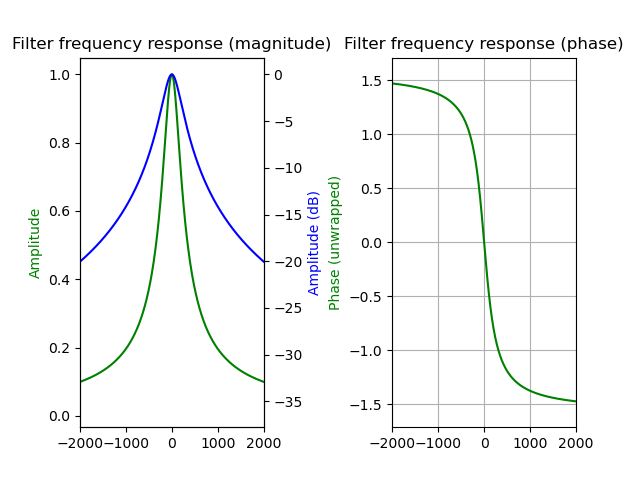

<IPython.core.display.Javascript object>


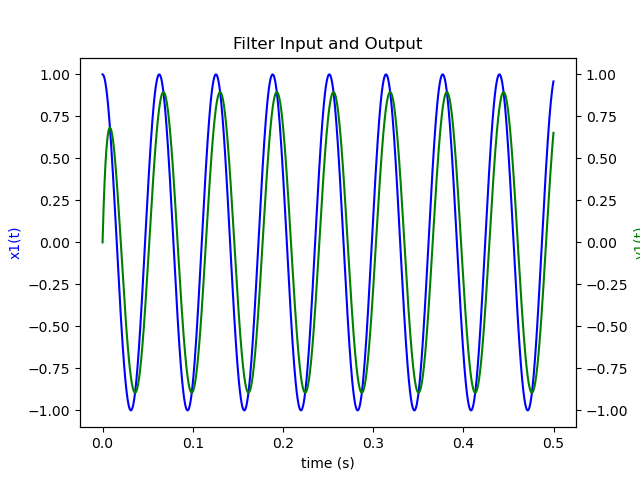

C:\Users\tynou\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-1.1, 1.1)

In [6]:
#A
fs = 4000
t = np.arange(0, 0.5, 1/fs)
x1 = np.cos(100*t) 

#B
nfft = 8192
b = [0, 200]
a = [1, 200]
sys = sig.lti(b, a)
f = np.arange(-nfft/2, nfft/2, 1)*(fs/nfft)
w = f*2*np.pi
w2, h_f = sig.freqresp(sys, w)

fig1 = plt.figure()
fig1.subplots_adjust(wspace=0.7)
ax1 = fig1.add_subplot(1, 2, 1)
plt.title('Filter frequency response (magnitude)')
plt.plot(w, abs(h_f), 'g')
plt.ylabel('Amplitude', color='g')
ax2 = ax1.twinx()
plt.plot(w, 20*np.log10(abs(h_f)), 'b')
plt.ylabel('Amplitude (dB)', color='b')
plt.xlabel('Frequency (rad/s)')
plt.xlim(-2000, 2000)

plt.subplot(1,2,2)
plt.title('Filter frequency response (phase)')
angles = np.unwrap(np.angle(h_f))
plt.plot(w, angles, 'g')
plt.ylabel('Phase (unwrapped)', color= 'g')
plt.grid()
plt.axis('tight')
plt.xlim(-2000, 2000)

#C
ty, y1, xs = sig.lsim(sys, x1, t)
fig2 = plt.figure()
plt.title('Filter Input and Output')
ax1 = fig2.add_subplot(1, 1, 1)
plt.plot(t, x1, 'b')
plt.ylabel('x1(t)', color='b')
plt.xlabel('time (s)')
plt.ylim(-1.1, 1.1)
ax2 = ax1.twinx()
plt.plot(t, y1, 'g')
plt.ylabel('y1(t)', color='g')
plt.ylim(-1.1, 1.1)



# Discussion #1

The non-ideal low pass filter results in an increasing dampening effect on any signay. With a higher frequency, the dampening is increased much more, but either way there is some dampening that occurs. With two filters in series, it would amplify the results of the initial dampening, resulting in an amplitude of just 1 times smaller than the amplitude with just 1 filter. 

# Assignment 2: Amplitude Modulation


<IPython.core.display.Javascript object>


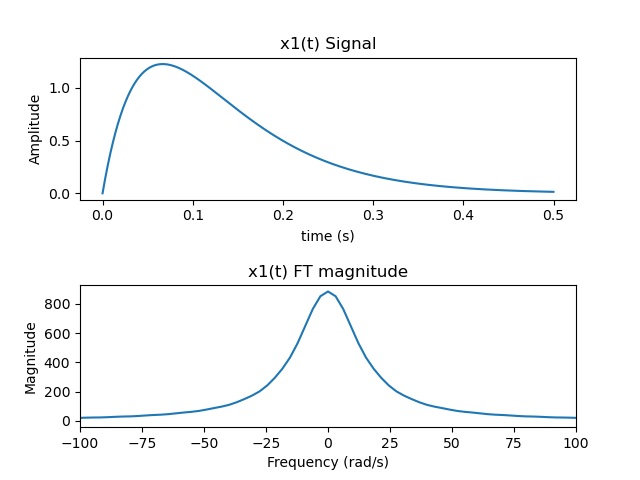

(-100.0, 100.0)

In [7]:
#Aa
fs = 4000
t = np.arange(0, 0.5, 1/fs)
x1 = 50*t*np.e**(-15*t)
x0 = -x1

#Ab
nfft = 8192
x1ft = np.fft.fft(x1, nfft)
x1ft = np.fft.fftshift(x1ft)
x1ft = np.abs(x1ft)

fig3 = plt.figure()
fig3.subplots_adjust(hspace=0.6)
fig3.add_subplot(2,1,1)
plt.title('x1(t) Signal')
plt.plot(t, x1)
plt.ylabel('Amplitude')
plt.xlabel('time (s)')
fig3.add_subplot(2,1,2)
plt.title('x1(t) FT magnitude')
plt.plot(w, x1ft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (rad/s)')
plt.xlim(-100, 100)

<IPython.core.display.Javascript object>


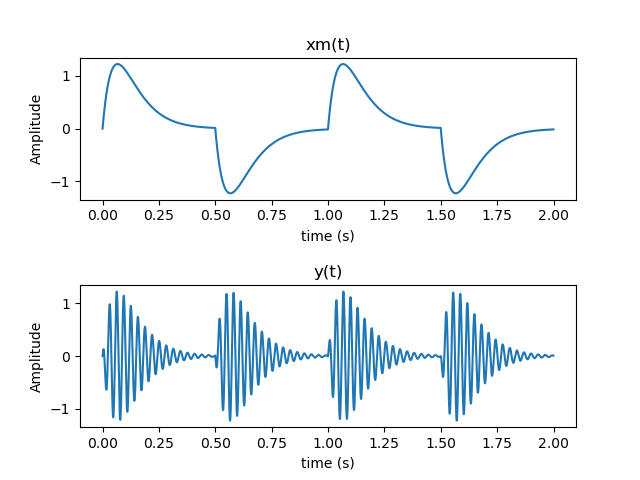

Text(0.5, 0, 'time (s)')

In [9]:
#B
xm = np.concatenate([x1,x0,x1,x0])
ty = np.arange(0, len(xm))/fs
c = np.cos(200*ty)
y = xm * c

#C
fig4 = plt.figure()
fig4.subplots_adjust(hspace=0.6)
fig4.add_subplot(2,1,1)
plt.title('xm(t)')
plt.plot(ty, xm)
plt.ylabel('Amplitude')
plt.xlabel('time (s)')
fig4.add_subplot(2,1,2)
plt.title('y(t)')
plt.plot(ty, y)
plt.ylabel('Amplitude')
plt.xlabel('time (s)')


<IPython.core.display.Javascript object>


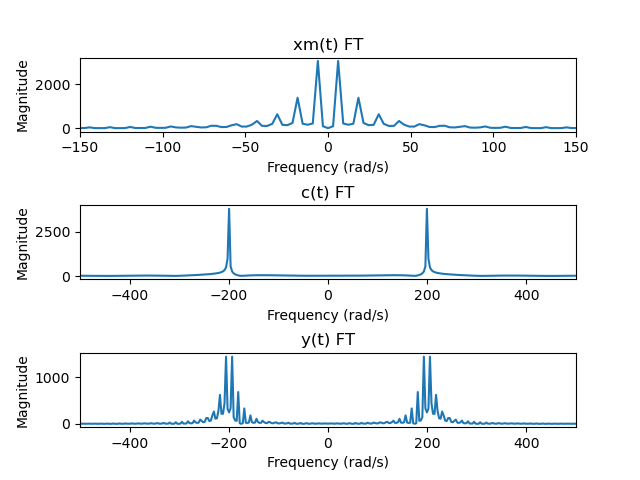

(-500.0, 500.0)

In [10]:
#C
xmft = np.fft.fft(xm, nfft)
xmft = np.fft.fftshift(xmft)
xmft = np.abs(xmft)

cft = np.fft.fft(c, nfft)
cft = np.fft.fftshift(cft)
cft = np.abs(cft)

yft = np.fft.fft(y, nfft)
yft = np.fft.fftshift(yft)
yft = np.abs(yft)

fig5 = plt.figure()
fig5.subplots_adjust(hspace=1)
fig5.add_subplot(3,1,1)
plt.title('xm(t) FT')
plt.plot(w, xmft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (rad/s)')
plt.xlim(-150, 150)

fig5.add_subplot(3,1,2)
plt.title('c(t) FT')
plt.plot(w, cft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (rad/s)')
plt.xlim(-500, 500)

fig5.add_subplot(3,1,3)
plt.title('y(t) FT')
plt.plot(w, yft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (rad/s)')
plt.xlim(-500, 500)

# Discussion #2

Yes, the system is LTI.
Demonstration:
𝑎∗𝑥(𝑡)∗𝑐𝑜𝑠(200𝑡) + 𝑏∗x(𝑡)∗𝑐𝑜𝑠(200𝑡) = (𝑎∗x(𝑡) + 𝑏∗x(𝑡)) ∗ 𝑐𝑜𝑠(200𝑡)
Since, cos(200t) is just factored out with the same equation resultant demonstrating that it is LTI.


# Assignment 3: Amplitude Demodulation


<IPython.core.display.Javascript object>


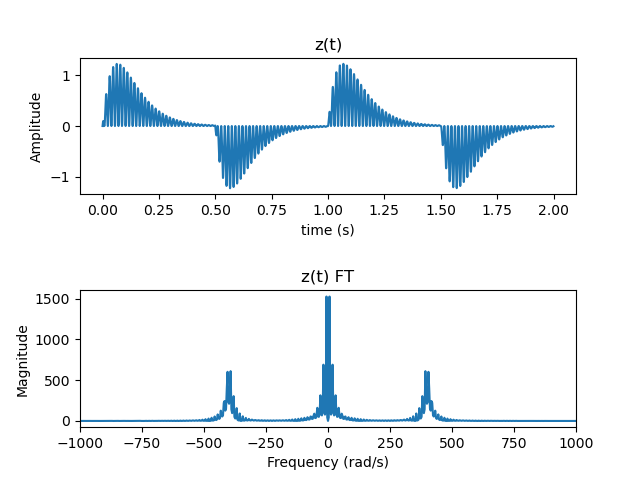

(-1000.0, 1000.0)

In [13]:
#A
t3 = np.arange(0, len(xm))/fs
z = y * c
zft = np.fft.fft(z, nfft)
zft = np.fft.fftshift(zft)
zft = np.abs(zft)

fig6 = plt.figure()
fig6.subplots_adjust(hspace=0.7)
fig6.add_subplot(2,1,1)
plt.title('z(t)')
plt.plot(t3, z)
plt.ylabel('Amplitude')
plt.xlabel('time (s)')

fig6.add_subplot(2,1,2)
plt.title('z(t) FT')
plt.plot(w, zft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (rad/s)')
plt.xlim(-1000, 1000)

<IPython.core.display.Javascript object>


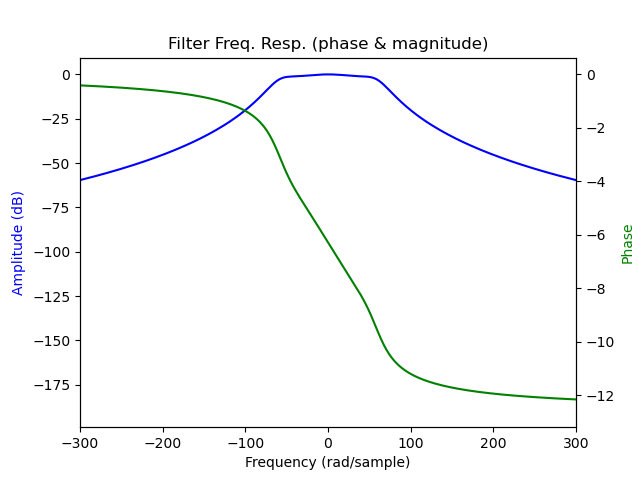

C:\Users\tynou\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


(-300.0, 300.0)

In [14]:
# Part B
b = [2e9]
a = [240, 3e4, 2.2e6, 1e8, 2e9]
low_pass = sig.lti(b, a)
_, h_f = sig.freqresp(low_pass, w)
fig7 = plt.figure(7)
plt.title('Filter Freq. Resp. (phase & magnitude)')
ax1 = fig7.add_subplot(111)
plt.plot(w, 20*np.log10(abs(h_f)), 'b')
plt.ylabel('Amplitude (dB)', color='b')
plt.xlabel('Frequency (rad/sample)')
ax2 = ax1.twinx()
plt.plot(w, np.unwrap(np.angle(h_f)), 'g')
plt.ylabel('Phase', color='g')
plt.xlim(-300, 300)

<IPython.core.display.Javascript object>


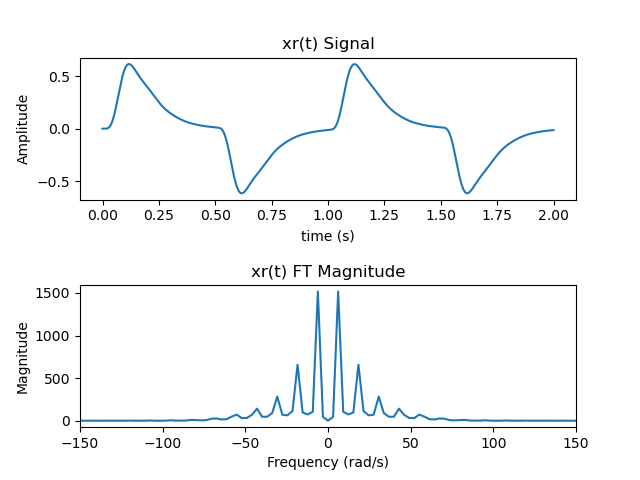

(-150.0, 150.0)

In [17]:
# Part C
_, xr, _ = sig.lsim(low_pass, z, t3)
xrft = np.fft.fft(xr, nfft)
xrft = np.fft.fftshift(xrft)
xrft = np.abs(xrft)
fig8 = plt.figure(8)
fig8.subplots_adjust(hspace=0.6)
fig8.add_subplot(211)
plt.title('xr(t) Signal')
plt.plot(t3, xr)
plt.ylabel('Amplitude')
plt.xlabel('time (s)')
fig8.add_subplot(212)
plt.title('xr(t) FT Magnitude')
plt.plot(w, xrft)
plt.ylabel('Magnitude')
plt.xlabel('Frequency (rad/s)')
plt.xlim(-150, 150)

# Discussion #3

The signal now has the term e^(-150t) instead of e^(-15t). As a result, it has a frequency component of -150 instead of -15 which is much higher in magnitude to it will be more affected by the filter. Additionally, the general form of the signal would be comporment and it would not result in a similar graph for 𝑥r(𝑡).

# Assignment 4: Decoding a Morse Code Message


In [19]:
# Part A
fs = 4000
t = np.arange(0, 0.5, 1/fs)
dash = 50*t*np.e**(-15*t)
dot = -dash
morse_dict = {
 '.- ': 'A',
 '-...': 'B',
 '-.-.': 'C',
 '-.. ': 'D',
 '. ': 'E',
 '..-.': 'F',
 '--. ': 'G',
 '....': 'H',
 '.. ': 'I',
 '.---': 'J',
 '-.- ': 'K',
 '.-..': 'L',
 '-- ': 'M',
 '-. ': 'N',
 '--- ': 'O',
 '.--.': 'P',
 '--.-': 'Q',
 '.-. ': 'R',
 '... ': 'S',
 '- ': 'T',
 '..- ': 'U',
 '...-': 'V',
 '.-- ': 'W',
 '-..-': 'X',
 '-.--': 'Y',
 '--..': 'Z'
}
# Decode a morse dot or dash signal
# x: input signal
# returns: the letter corresponding to the morse signal
def decode(x):
    code = ""
    for i in range(4):
        xi = x[2000*i:2000*(i+1)]
        # calculate a sum of squared error
        dash_err = np.sum((xi - dash)**2)
        dot_err = np.sum((xi - dot)**2)

        # threshold of 500 selected through trial and error
        if dash_err < 500:
            code += '-'
        elif dot_err < 500:
            code += '.'
        else:
            code += ' '
    return morse_dict[code]


# Part B
file = open('message_modulated.csv', 'rb')
mod_msg = np.loadtxt(file, delimiter=',')
t = np.arange(0, 2, 1/fs)
c_signals = [np.cos(freq*t) for freq in [100, 200, 400]]


# Part C
for i in range(3):
    z = mod_msg*c_signals[i]
    _, demod_msg, _ = sig.lsim(low_pass, z, t)

    msg = decode(demod_msg)
    print("Message m" + str(i) + "(t) is:", msg)


Message m0(t) is: Y
Message m1(t) is: O
Message m2(t) is: U


# Discussion #4

We believe that the convolution method that involves matching one signal to another can be more effective and useful in this case because the output signal doesn't align well with the input signal. This results in high squared errors for the result. The method of convolution doesn't care about alignment, but it just cares about two signals conforming to a same/similar shapes and area. 

The decoded signal: "The future of technology lies in YOU"